<a href="https://colab.research.google.com/github/Vaishugaikwad1709/CodSoft-Task/blob/main/TASK_2_MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('movie-dataset.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
shape =df.shape
print(f"Number off rows: {shape[0]}, Number of columns: {shape[1]} ")

Number off rows: 15509, Number of columns: 10 


In [ ]:
unique_genres=df['Genre'].unique()
print("Unique Genres", unique_genres)

Unique Genres ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, 

In [ ]:
rating_dist=df['Rating'].value_counts()
print("Rating Distribution:\n", rating_dist)

Rating Distribution:
 6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
attributes=['Name', 'Year', 'Duration', 'Votes', 'Rating']
df.dropna(subset=attributes, inplace=True)
missing_val=df.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
movie_name_rating=df[['Name', 'Rating']]
print(movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


In [ ]:
df_sorted=df.sort_values(by='Votes', ascending =False)
df_sorted['Vote_Count_Percentile']=df_sorted['Votes'].rank(pct=True)*100
df_sorted.reset_index(drop=True, inplace=True)
print(df_sorted[['Name', 'Votes', 'Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime    999             100.000000
1                               Hera Pheri    998              99.982909
2                              Kurukshetra    996              99.965818
3                                  Mazdoor     99              99.905999
4                                    Login     99              99.905999
...                                    ...    ...                    ...
5846                                 Fugly  1,008               0.085455
5847                  Daud: Fun on the Run  1,006               0.059819
5848                 Love Breakups Zindagi  1,006               0.059819
5849                      Patthar Ke Phool  1,004               0.034182
5850                        15 Park Avenue  1,002               0.017091

[5851 rows x 3 columns]


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df=df.dropna(subset=['Votes'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df['Year']=df['Year'].astype(str)
df['Duration ']=df['Duration'].astype(str)
df['Year']=df['Year'].str.extract('(\d+)').astype(float)
df['Duration']=df['Duration'].str.extract('(\d+)').astype(float)
x=df[['Year', 'Duration', 'Votes']]
y=df['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
x_train['Votes'] = x_train['Votes'].replace({',': ''}, regex=True).astype(float)
x_test['Votes'] = x_test['Votes'].replace({',': ''}, regex=True).astype(float)
model=LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mae=mean_absolute_error(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred, squared=False)
r2= r2_score(y_test, y_pred)
print(f"Mean Absolute Error:{mae}")
print(f"Root Mean Squared Error:{rmse}")
print(f"R-squared(R2) Score:{r2}")

Mean Absolute Error:1.0668333990630772
Root Mean Squared Error:1.3396081919647003
R-squared(R2) Score:0.035455931518244665


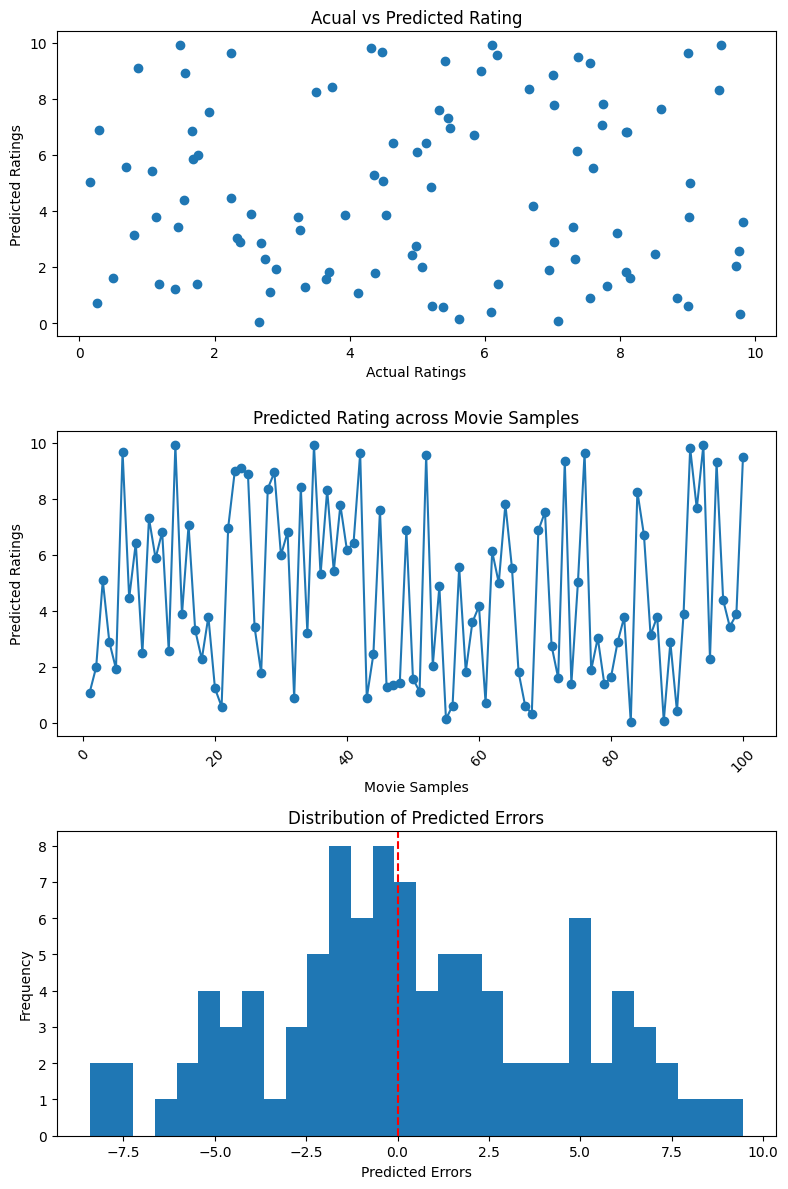

In [ ]:
y_test=np.random.rand(100)*10 #actual
y_pred=np.random.rand(100)*10 #predicted
errors=y_test-y_pred
fig, axs=plt.subplots(3, 1, figsize=(8,12))

axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Acual vs Predicted Rating")

movie_samples=np.arange(1, len(y_pred) + 1)
axs[1].plot(movie_samples, y_pred, marker='o', linestyle='-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Rating across Movie Samples")
axs[1].tick_params(axis='x', rotation=45)

axs[2].hist(errors, bins=30)
axs[2].set_xlabel("Predicted Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Predicted Errors")
axs[2].axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()